# Linear regression using NumPy

In [2]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt

## Data Generation

In [4]:
# initialize your random seed to ensure reproducibility of your result
np.random.seed(42) # Why 42 (It works well for computer science) - https://medium.com/@leticia.b/the-story-of-seed-42-874953452b94

# randomly generate x which is a vector of 100 points 
x = np.random.rand(100, 1)

# define exact linear function y = 1 + 2x + epsilon where epsilon (0.1*random numbers)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

## split data into train and validation sets (80/20)

In [5]:
# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]

# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]


## plot the train and validation sets

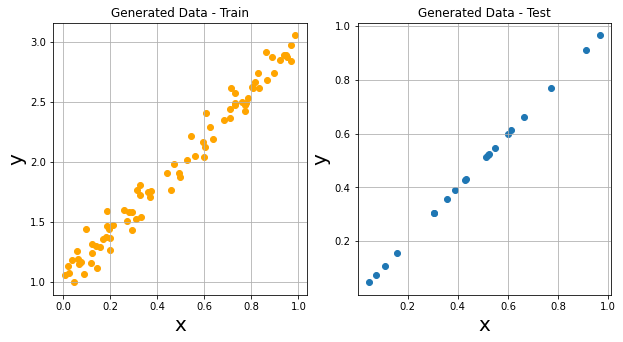

In [6]:
plt.figure(figsize=(10,5))

# plot the train set 
plt.subplot(1,2,1)
plt.scatter(x_train,y_train, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

# plot the validation set 
plt.subplot(1,2,2)
plt.scatter(x_val,x_val)  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

## linear regression using numpy 

In [7]:
# initialize your random seed to ensure reproducibility of your result
np.random.seed(42)

# Initializes parameters "a" and "b" randomly - they don't need to be good yet
a = np.random.randn(1)
b = np.random.randn(1)

# print values of a and b 
print(a, b)


[0.49671415] [-0.1382643]


In [9]:
# Initialization of hyper-parameters (in our case, only learning rate and number of epochs)

# Sets learning rate (how much the AI conforms to each set of feedbacks)
lr = 1e-1
# Defines number of epochs (how many times training is repeated)
n_epochs = 1000

### For each epoch, there are 5 training steps:
* Compute model’s predictions 
* Compute the error (the difference between the actual value and predicted value) 
* Compute the loss ( mean square error = the average of (error)^2)
* Compute the gradients for every parameter (require calculus)
* Update the parameters a and b

In [10]:
for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = a + b * x_train
    
    # How wrong is our model? That's the error! 
    error = (y_train - yhat)
    
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()
    
    # Computes gradients for both "a" and "b" parameters
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()
    
    # Updates parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad
    
print(a, b)

[1.02354094] [1.96896411]


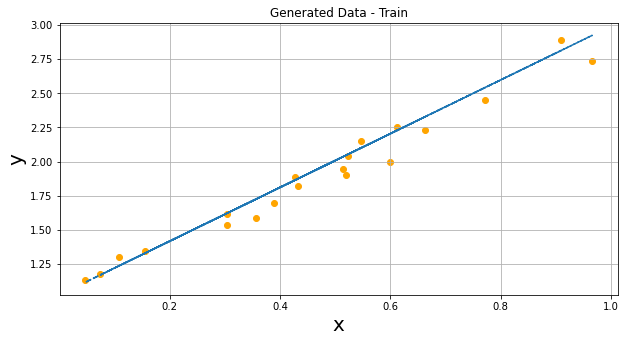

In [11]:
plt.figure(figsize=(10,5))
y_vals = a + b * x_val
plt.plot(x_val, y_vals, '--')

plt.scatter(x_val,y_val, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')
plt.show()

## check our results use Scikit-learn's linear regression

Just to make sure we haven’t done any mistakes in our code, we can use Scikit-Learn’s Linear Regression to fit the model and compare the coefficients.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [0]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

## The results!

They match up to 6 decimal places — we have a fully working implementation of linear regression using Numpy.